In [9]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.base import clone
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

In [1]:
np.random.seed(42)

def target_function(M, x):
    y = 2 + x + 0.5*x**2
    return y


M = 100
x = 6*np.random.rand(M, 1) - 3
y = target_function(M, x)
y_noisy = y + np.random.randn(M, 1)


Mtest = 100
x_test = np.linspace(-3, 3, Mtest).reshape(Mtest, 1)
y_test = target_function(Mtest, x_test) + np.random.randn(Mtest, 1)

NameError: name 'np' is not defined

In [37]:
x_train, x_val, y_train, y_val = train_test_split(x, y_noisy, test_size=0.7, random_state=42)

NameError: name 'train_test_split' is not defined

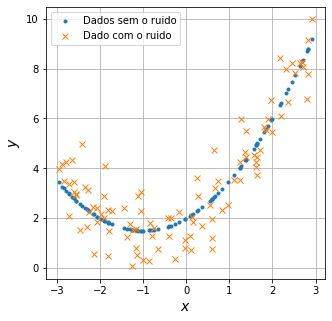

In [47]:
fig = plt.figure(figsize=(5,5))
plt.plot(x, y, '.', label='Dados sem o ruido')
plt.plot(x, y_noisy, 'x', label='Dado com o ruido')
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.legend()
plt.grid()
#Plotando o gráfico
plt.show()

In [2]:
# Definindo a variavel lambda
lambdas = np.linspace(1*10**-11, 1, 1000)

include_bias = True

# Definindo a ordem do polinomio
model_order = 90


train_errors, val_errors, test_errors = [], [], []
minimum_val_error = float("inf")
best_epoch = None
best_model = None
best_lambda = None

for i in range(0,len(lambdas)):
   
    poly_features = PolynomialFeatures(degree=model_order, include_bias=include_bias)
   
    scaler = StandardScaler()

    reg = Lasso(alpha=lambdas[i], tol=1, random_state=42) if lambdas[i] > 0 else LinearRegression()
  
    model = Pipeline([
        ("poly_features", poly_features),
        ("scaler", scaler),
        ("reg", reg),
    ])
    
    model.fit(x_train, y_train)
    
    y_train_predict = model.predict(x_train)
    y_val_predict = model.predict(x_val)
    y_test_predict = model.predict(x_test)
    
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))
    test_errors.append(mean_squared_error(y_test, y_test_predict))
    
    if val_errors[i] < minimum_val_error:
        minimum_val_error = val_errors[i]
        best_epoch = i
        best_model = clone(model)
        best_lambda = lambdas[i]
        
print('best_epoch:',best_epoch)
print('best_lambda:',best_lambda)
print('minimum_val_error:',minimum_val_error)

NameError: name 'np' is not defined

ValueError: x and y must have same first dimension, but have shapes (1000,) and (0,)

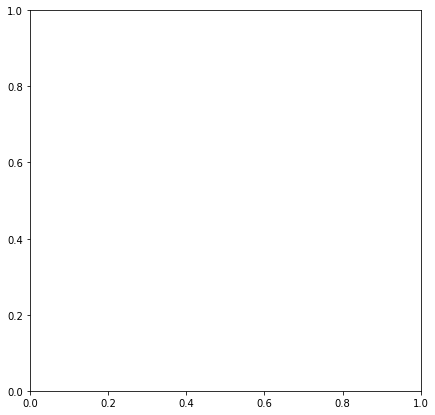

In [40]:
fig = plt.figure(figsize=(7,7))

plt.plot(lambdas, train_errors, "r-", linewidth=3, label="Conjunto de treinamento")
plt.plot(lambdas, val_errors, "b--", linewidth=3, label="Conjunto de validação")
plt.plot(lambdas, test_errors, "k--", linewidth=3, label="Conjunto de testes")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel('$\lambda$', fontsize=14)
plt.ylabel("Erro quadrático médio", fontsize=14)
plt.grid()
plt.show()

In [41]:
best_model.fit(x_train, y_train)

fig = plt.figure(figsize=(7,7))
plt.plot(x, y, '.', label='Dado original')
plt.plot(x, best_model.predict(x), 'x', label='Hipótese')
plt.ylim([1, 10])
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.legend(fontsize=14)
plt.grid()
plt.show()

AttributeError: 'NoneType' object has no attribute 'fit'

In [42]:

print('Lambda: %1.4e:' % (best_lambda))
print(best_model.named_steps['reg'].intercept_)
print(best_model.named_steps['reg'].coef_)

TypeError: must be real number, not NoneType

In [3]:
train_errors, val_errors, test_errors = [], [], []
minimum_val_error = float("inf")
best_epoch = None
best_model = None
best_lambda = None

for i in range(0,len(lambdas)):
   
    poly_features = PolynomialFeatures(degree=model_order, include_bias=include_bias)
    
    scaler = StandardScaler()
   
    reg = Ridge(alpha=lambdas[i], tol=1)
    
    model = Pipeline([
        ("poly_features", poly_features),
        ("scaler", scaler),
        ("reg", reg),
    ])
    
    model.fit(x_train, y_train)
    
    y_train_predict = model.predict(x_train)
    y_val_predict = model.predict(x_val)
    y_test_predict = model.predict(x_test)
    
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))
    test_errors.append(mean_squared_error(y_test, y_test_predict))
    
    if val_errors[i] < minimum_val_error:
        minimum_val_error = val_errors[i]
        best_epoch = i
        best_model = clone(model)
        best_lambda = lambdas[i]
        
print('best_epoch:',best_epoch)
print('best_lambda:',best_lambda)
print('minimum_val_error:',minimum_val_error)

NameError: name 'lambdas' is not defined

ValueError: x and y must have same first dimension, but have shapes (1000,) and (0,)

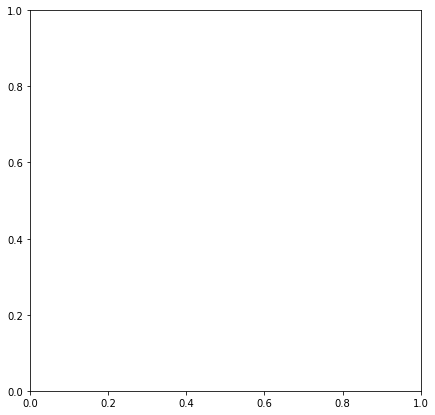

In [44]:

fig = plt.figure(figsize=(7,7))

plt.plot(lambdas, train_errors, "r-", linewidth=3, label="Conjunto de treinamento")
plt.plot(lambdas, val_errors, "b--", linewidth=3, label="Conjunto de validação")
plt.plot(lambdas, test_errors, "k--", linewidth=3, label="Conjunto de testes")
plt.legend(loc="upper right", fontsize=14)
plt.yscale('log')
plt.xlabel('$\lambda$', fontsize=14)
plt.ylabel("Erro quadrático médio", fontsize=14)
plt.grid()
plt.show()

In [45]:
best_model.fit(x_train, y_train)

fig = plt.figure(figsize=(7,7))
plt.plot(x, y, '.', label='Dado original')
plt.plot(x, best_model.predict(x), 'x', label='Hipótese')
plt.ylim([1, 10])
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.legend(fontsize=14)
plt.grid()
plt.show()

AttributeError: 'NoneType' object has no attribute 'fit'

In [46]:
print('Lambda: %1.4e:' % (best_lambda))
print(best_model.named_steps['reg'].intercept_)
print(best_model.named_steps['reg'].coef_)

TypeError: must be real number, not NoneType